In [20]:
from PIL import Image
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline  

In [71]:
dataFolder = '/home/roshan/Documents/FreelanceWork/Logistic_Apple_Classification/data/'

subFolders = ['normal','blotch','rot','scab']

imgSizes={}
imgData={}

for folder in subFolders:
    imgData[folder]=0
    imgs=[]
    
    
    for i in range(80):
        img = Image.open(dataFolder+str(folder)+'/'+str(folder)+' ('+str(i+1)+').JPG').convert('LA')
        imgs.append(img)
    imgData[folder] = imgs                
    
    
        



In [72]:
#IMAGE RESIZING

imgSize = (200,200)

for folder in subFolders:
    for i in range(80):
        img = imgData[folder][i].resize(imgSize)
        imgData[folder][i] = img
    

In [82]:
#READING THE PIXEL LEVEL DATA 
imgPixelData = {}

for folder in subFolders:
    imgPixelData[folder]=0
    pixelDataList=[]
    
    for i in range(80):
        data = list(imgData[folder][i].getdata())
        pixelData = np.array([float(x[0]/255.0) for x in data])
        pixelDataList.append(pixelData)
    
    imgPixelData[folder]=pixelDataList
    
    
        

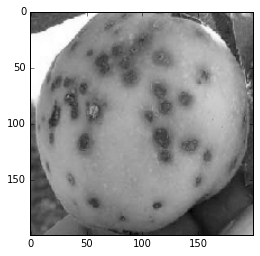

In [88]:
i=10
folder = 'scab'
plt.imshow(np.reshape(imgPixelData[folder][i], (200,200)),cmap = 'gray')

In [89]:
#Preparing Train and test data

classes = [('normal',0),('scab',1)] # Can add multiple folders to the same class for one-vs-all classification

imgData = []
imgLabel = []

for folder in classes:
    
    for i in range(80):
        imgData.append(imgPixelData[folder[0]][i])
        imgLabel.append(folder[1])

In [90]:
len(imgData)

160

In [ ]:
trainSize = len(trainData)
batchSize = 100
nEpochs = 15
learningRate = 0.001

W = np.random.uniform(low = -np.sqrt(6.0/(196 + 1)), high = np.sqrt(6.0/(196 + 1)), size= (196,))

In [ ]:
# TRAINING
for i in range(nEpochs):
    
    for batch in range(0,len(trainData),batchSize):
    
        batchData = np.array(trainData[batch:(batch+batchSize)])
        batchLabel = np.array(trainLabel2[batch:(batch+batchSize)])
        
        y_pred = np.array([sigmoid(x) for x in np.matmul(batchData,W)])

        cost = likelihood(y_pred,batchLabel)
        #print("cost is %f"%cost)
        
        for wgt in range(len(W)):
            inputSlice = batchData[:,wgt]
            error = batchLabel - y_pred

            derivative = np.sum(inputSlice*error)
            W[wgt] = W[wgt] + learningRate*derivative
            
        
        trainAccuracy = accuracy(W,trainData,trainLabel2)
        testAccuracy = accuracy(W,testData,testLabel2)
    print("train accuracy is %f and test accuracy is %f"%(trainAccuracy,testAccuracy))
    
        
        
    
    